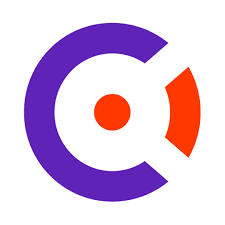
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Bisiklet satışları

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## 1) Veriyi yükleme ve kurcalama

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Eğer Google Collab kullanıyorsan (ve eğer aşağıdaki yorumdaysa) aşağıdaki hücreyi yorumdan çıkarıp çalıştır, ve bir onun altındaki hücredeki dosya yolunu drive'daki dosya yoluyla değiştir. Verimizi bu şekilde yükleyeceğiz.

In [ ]:
# Eğer Google Collab kullanıyorsan 
# (ve eğer bu hücre yorumdaysa)
# bu hücreyi yorumdan çıkarıp çalıştır,
# ve bir aşağıdaki hücredeki dosya yolunu değiştir.
#
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
sales = pd.read_csv("/content/drive/MyDrive/VeriAnaliziGiris/sales_data.csv", parse_dates=['Date'])

In [ ]:
sales.head()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### `Customers_Age` ortalaması kaç?

`.mean()` ile deneyelim

In [ ]:
sales['Musteri_Yasi'].mean()

`Customer_Age` verisiyle bir <b>yoğunluk (KDE, Kernel density estimation)</b> ve <b>kutu grafiği</b> çizdirelim:

In [ ]:
sales['Musteri_Yasi'].plot(kind='kde', figsize=(14,4))

In [ ]:
sales['Musteri_Yasi'].plot(kind='box', vert=False, figsize=(14,4))

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## 2) Veriyi temizleme

Önce verinin özelliklerini inceleyelim:

In [ ]:
sales.info()

Adımlarımızı hatırlayalım. Veride temizlememiz gereken bir şey var mı?

In [ ]:
sales.isnull().sum()

In [ ]:
print(f"Toplam null (boş) veri: {sales.isnull().sum().sum()}")

In [ ]:
sales = sales.dropna()
sales.isnull().sum()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## 3) Veriyi detaylı inceleme

Genel bir bakış atalım:

In [ ]:
sales.describe()

### `Siparis_Miktari` ortalaması?

In [ ]:
sales['Siparis_Miktari'].mean()

`Siprais_Miktari` verisinin <b>histogram</b> ve <b>kutu grafiğini</b> çizdirelim:

In [ ]:
sales['Siparis_Miktari'].plot(kind='hist', bins=30, figsize=(14,4), ylabel="Frekans", xlabel="Siparis Miktari")

In [ ]:
sales['Siparis_Miktari'].plot(kind='box', vert=False, figsize=(14,4))

### Yıllık ne kadar satışımız var?

In [ ]:
sales['Year'].value_counts()

Bu verinin bir <b>pie plot (daire grafiğini)</b> çıkaralım:

In [ ]:
sales['Year'].value_counts().plot(kind='pie', figsize=(6,6), ylabel="Yillik Satis Miktari")

*Bu veri ne işimize yarayabilir?*

### Aylık ne kadar verimiz var?

Bütün yıllarda aylık ne kadar satış yaptığımıza bakacağız.

In [ ]:
sales['Month'].value_counts()

Bu verinin bir **bar plot'unu (çubuk grafik)** çizdirelim:

In [ ]:
sales['Month'].value_counts().plot(kind='bar', figsize=(14,6))

### En çok satışı hangi ülkede yapmışız?

In [ ]:
sales['Ulke'].value_counts().head(1)

In [ ]:
sales['Ulke'].value_counts()

Ülke başına satışı gösteren bir <b>bar plot (kutu grafiği)</b> çizdirelim:

In [ ]:
sales['Ulke'].value_counts().plot(kind='bar', figsize=(14,4))

### Peki ya ürünleri incelersek?

Sattığımız bütün ürünlerin isimlerini çıkaralım:

In [ ]:
sales['Urun'].unique()

Tamam, ama çok fazla ürün var ve benim için anlamlı olanlar en çok sattıklarım, en çok satılan **10 ürünü** bastıralım:

In [ ]:
sales['Urun'].value_counts().head(10).plot(kind='bar', figsize=(14,4))

### Satışların Yaş Gruplarına göre dağılımı

In [ ]:
sales['Yas_Grubu'].value_counts().plot(kind='pie', figsize=(6,6))

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## 4) Bağlantılar Kurmak

### `Birim_Maliyeti` ve `Birim_Fiyati` arasında bir bağlantı var mı?

Şu ana kadar hep tek değer üzerinden analiz yaptık, şimdiyse iki değer arasında bir bağlantı kurmaya çalışacağız. İki değeri kullanarak bir <b>scatter plot (serpme grafiği)</b> çizdirelim.

In [ ]:
sales.plot(kind='scatter', x='Birim_Maliyeti', y='Birim_Fiyati', figsize=(6,6))

### `Siparis_Miktari` ve `Kazanc` arasında bir ilişki var mı?

İki sütunu kullanarak bir **scatter plot** çizdirelim.

In [ ]:
sales.plot(kind='scatter', x='Siparis_Miktari', y='Kazanc', figsize=(6,6))

### `Ulke` başına `Kazanc`

Ülke başına ortalama kazancı gördüğümüz biz **bar plot** çizdirelim:

In [ ]:
sales.groupby('Ulke')['Kazanc'].mean().plot(kind='bar', figsize=(10,4))

Her ülke için kazançları gösteren bir **kutu grafiği** yapalım.

In [ ]:
sales[['Kazanc', 'Ulke']].boxplot(by='Ulke', figsize=(10,6))

### `Ulke` başına `Musteri_Yasi`'nda bir ilişki var mı?

In [ ]:
sales[['Musteri_Yasi', 'Ulke']].boxplot(by='Ulke', figsize=(10,6))

### `Hesaplanmis_Tarih` adında yeni bir sütun hesapla ve ekle 

`Day`(Gün), `Month`(Ay) ve `Year`(Yıl) verisini kullanarak `Tarih` adında yeni bir sütun ekleyeceğiz ve formatı şu şekilde olacak: (`YYYY-MM-DD`).

In [ ]:
sales['Hesaplanmis_Tarih'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

sales['Hesaplanmis_Tarih'].head()

#### `Calculated_Date` sütununu veriye `datetime` formatında ekleyelim

In [ ]:
sales['Hesaplanmis_Tarih'] = pd.to_datetime(sales['Hesaplanmis_Tarih'])

sales['Hesaplanmis_Tarih'].head()

### `Canada` ve `France`'da ne kadar satış olmuş?

In [ ]:
sales.loc[(sales['Ulke'] == 'Canada') | (sales['Ulke'] == 'France')].shape[0]

### Kadın-Erkek satış oranı

In [ ]:
sales['Musteri_Cinsiyeti'].value_counts()

In [ ]:
sales['Musteri_Cinsiyeti'].value_counts().plot(kind='bar')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## 5) Daha Detaylı Sorular Sormak

### 500'den daha fazla `Hasilat` değerine sahip satışların kaç tanesi kadınlar tarafından yapıldı?

In [ ]:
sales.loc[(sales['Musteri_Cinsiyeti'] == 'F') & (sales['Hasilat'] == 500)].shape[0]

### En çok `hasilat` getiren 5 satis

In [ ]:
sales.sort_values(['Hasilat'], ascending=False).head(5)

### En çok `Hasilat` yapan satış

In [ ]:
cond = sales['Hasilat'] == sales['Hasilat'].max()

sales.loc[cond]

### 2016 Mayıs'ta ne kadar sipariş verildi?

In [ ]:
cond = (sales['Year'] == 2016) & (sales['Month'] == 'May')

sales.loc[cond].shape[0]

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## 6) Bir analiz yapalım

Her ay ne kadar satış yaptığımıza bakalım: 

### Korelasyon bulabilir miyiz?

Veride manalı bir ilişki var mı?

In [ ]:
sales.groupby(sales['Hesaplanmis_Tarih'].dt.to_period('M'))['Siparis_Miktari'].sum().plot(kind='bar', figsize=(14, 4))
plt.xlabel('Month-Year')
plt.ylabel('Toplam Satis')
plt.title('Aylik satis')
plt.show()

In [ ]:
corr = sales.corr(numeric_only=True)

corr

Artık çok daha fazlasını yapmaya hazırız. 

Machine learning -> AI